# 과제 - 유방암 데이터 PCA
- 2, 5, 10 차원으로 차원축소
- 원본과 차원축소한 데이터의 분류 정확도 비교
- 2차원 축소한 것은 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 로딩과 정규화

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

- 차원 축소

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

- PCA 전후 분류정확도 비교

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
# 원본
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)
lrc = LogisticRegression(random_state=2021)
lrc.fit(X_train, y_train)
acc = lrc.score(X_test, y_test)
acc

1.0

In [10]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)
lrc = LogisticRegression(random_state=2021)
lrc.fit(X_train, y_train)
acc = lrc.score(X_test, y_test)
acc

0.9649122807017544

In [11]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2021
    )
    lrc = LogisticRegression(random_state=2021)
    lrc.fit(X_train, y_train)
    acc = lrc.score(X_test, y_test)
    return acc

In [14]:
for n in [2,5,10,0]:
    if n == 0:
        acc = pca_accuracy(cancer_std, cancer.target)
        print(f'원 데이터 - 정확도: {acc:.4f}')
    else:
        pca = PCA(n_components=n)
        cancer_pca = pca.fit_transform(cancer_std)
        explained = sum(pca.explained_variance_ratio_)
        acc = pca_accuracy(cancer_pca, cancer.target)
        print(f'PCA {n} - 정확도 {acc:.4f}, 설명력: {explained:.4f}')

PCA 2 - 정확도 0.9649, 설명력: 0.6324
PCA 5 - 정확도 0.9912, 설명력: 0.8473
PCA 10 - 정확도 0.9912, 설명력: 0.9516
원 데이터 - 정확도: 1.0000


- 시각화

In [18]:
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)
df['PC1'] = cancer_pca[:,0]
df['PC2'] = cancer_pca[:,1]

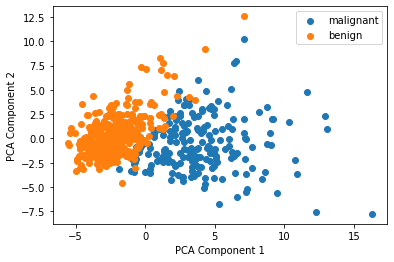

In [20]:
for i in range(2):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, label=cancer.target_names[i])
    
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()